# Python Session 2

Now we are going to practice some analyses with our data 

In [5]:
# Load in our choice and demographic data
import pandas as pd
data=pd.read_csv("/Users/emilylloyd/Documents/Coding Course/demo.csv")
choices=pd.read_csv("/Users/emilylloyd/Documents/Coding Course/FCT_df.csv")

In [7]:
df_merged = pd.merge(data, choices, on='ID', how='left')


In [9]:
# Now summarize the means and reaction times for foods varying in fat and sugar

#Now let's create a new dataframe and store each persons average RT and rating for high and low fat foods

# Group by participant, block, and fat level
summary_df = (
    df_merged
    .dropna(subset=['rating', 'reaction_time'])  # Exclude trials with missing values
    .groupby(['ID', 'block', 'fat','sugar'])
    .agg(
        average_rating=('rating', 'mean'),
        average_reaction_time=('reaction_time', 'mean'),
        trial_count=('rating', 'count')  # Optional: to see how many valid trials per group
    )
    .reset_index()
)

print(summary_df.head())

   ID   block   fat sugar  average_rating  average_reaction_time  trial_count
0   1  choice  high  high        5.533333               2.530667           30
1   1  choice  high   low        5.000000               2.088333           12
2   1  choice   low  high        5.000000               1.842857           14
3   1  choice   low   low        5.176471               2.118824           17
4   1  health  high  high        6.285714               2.490571           35


In [30]:
# Pivot to wide format
df_wide  = summary_df.pivot_table(
    index='ID',
    columns=['block', 'fat','sugar'],
    values=['average_rating', 'average_reaction_time']
)



# Flatten the column names
df_wide.columns = [
    f"{val}_{block}_fat{fat}_sugar{sugar}"
    for val, block, fat, sugar in df_wide.columns
]

df_wide = df_wide.reset_index()
print(df_wide.head())



   ID  average_rating_choice_fathigh_sugarhigh  \
0   1                                 5.533333   
1   2                                 4.965517   
2   3                                 5.400000   
3   4                                 5.000000   
4   5                                 5.285714   

   average_rating_choice_fathigh_sugarlow  \
0                                5.000000   
1                                4.714286   
2                                5.333333   
3                                5.230769   
4                                6.000000   

   average_rating_choice_fatlow_sugarhigh  \
0                                5.000000   
1                                6.187500   
2                                5.222222   
3                                4.090909   
4                                5.000000   

   average_rating_choice_fatlow_sugarlow  \
0                               5.176471   
1                               6.846154   
2                        

In [63]:
# now select some columns from the demographic frame and merge with our wide_df
demo_sub=data[['ID','Patient','BMI','EDE Score','Age']]


In [64]:
demo_sub=pd.merge(demo_sub,df_wide,on='ID',how='left')

In [35]:
demo_sub

,ID,Patient,BMI,EDE Score,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,average_rating_health_fathigh_sugarlow,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
0,1,Yes,17.9,4.9,5.533333,5.000000,5.000000,5.176471,6.285714,6.750000,...,1.842857,2.118824,2.490571,2.122500,2.568571,2.295333,2.689545,1.933333,2.017368,2.045789
1,2,Yes,18.6,5.3,4.965517,4.714286,6.187500,6.846154,5.357143,5.600000,...,2.751875,2.696923,2.089286,2.365333,2.140588,2.759333,2.331471,2.449286,2.250000,2.568571
2,3,No,22.3,0.6,5.400000,5.333333,5.222222,6.800000,5.500000,6.166667,...,1.654444,2.846000,2.420714,2.274444,2.129167,1.995000,2.201613,1.737000,2.311111,2.371364
3,4,No,22.9,0.5,5.000000,5.230769,4.090909,5.736842,4.818182,5.000000,...,2.538182,2.412632,2.270455,2.030714,2.410417,2.580000,2.312500,2.423333,1.713000,1.317500
4,5,Yes,15.7,4.1,5.285714,6.000000,5.000000,5.812500,5.838710,6.083333,...,2.267333,2.585625,2.168065,2.430833,1.938824,2.593077,2.277813,1.980000,2.262222,2.510833
5,6,Yes,17.2,3.5,5.967742,7.125000,5.777778,7.461538,5.878788,5.300000,...,2.367222,1.875385,2.300000,2.284000,2.374615,2.649444,2.038500,2.294545,2.050000,2.658333
6,7,Yes,18.7,4.6,4.750000,7.133333,4.588235,7.000000,4.833333,5.000000,...,2.330588,1.383333,2.287000,1.992222,2.058889,2.368333,2.142333,2.453571,2.330000,2.006000
7,8,Yes,17.2,4.2,5.714286,6.055556,6.083333,3.666667,4.500000,5.416667,...,1.725000,2.435333,2.255833,1.726667,2.392222,2.361429,2.236875,1.755000,2.502308,2.672500
8,9,No,22.0,1.7,5.600000,5.894737,5.125000,3.933333,5.750000,7.470588,...,2.236875,2.276000,2.206429,2.453529,2.096875,2.468462,1.890556,2.173077,2.406429,2.672000
9,10,No,22.8,0.2,4.869565,5.900000,6.058824,4.357143,5.214286,6.444444,...,2.292941,1.992143,2.355714,2.322222,2.098400,2.050769,2.500000,1.955714,1.837273,2.498125


In [ ]:
# now let's group by patient group and calculate means of food ratings, BMI, age, EDEQ
# we first need to import numpy


In [36]:
# mean is np.mean()
import numpy as np
np.mean(demo_sub.BMI)

np.float64(20.252499999999998)

In [40]:
import pandas as pd
from scipy.stats import ttest_ind

In [41]:
# now lets compare the groups using a t-test
vars_to_test=['BMI']
# Split the data by group
patients = demo_sub[demo_sub['Patient'] == 'Yes']
controls = demo_sub[demo_sub['Patient'] == 'No']

# Store results
results = []

for var in vars_to_test:
    # Run t-test
    t_stat, p_val = ttest_ind(patients[var], controls[var], equal_var=False)  # Welch's t-test
    
    results.append({
        'variable': var,
        'mean_patient': patients[var].mean(),
        'mean_control': controls[var].mean(),
        't_stat': t_stat,
        'p_value': p_val
    })

# Convert to DataFrame
ttest_results = pd.DataFrame(results)
print(ttest_results)

  variable  mean_patient  mean_control     t_stat       p_value
0      BMI     17.304762     23.510526 -10.791807  1.388539e-11


What do these data tell us?

In [ ]:
# Now let's average across the high and low sugar foods for each person - we need to create a new variable

In [44]:
# Now do some plots to show associations between two variables
import matplotlib.pyplot as plt
import seaborn as sns



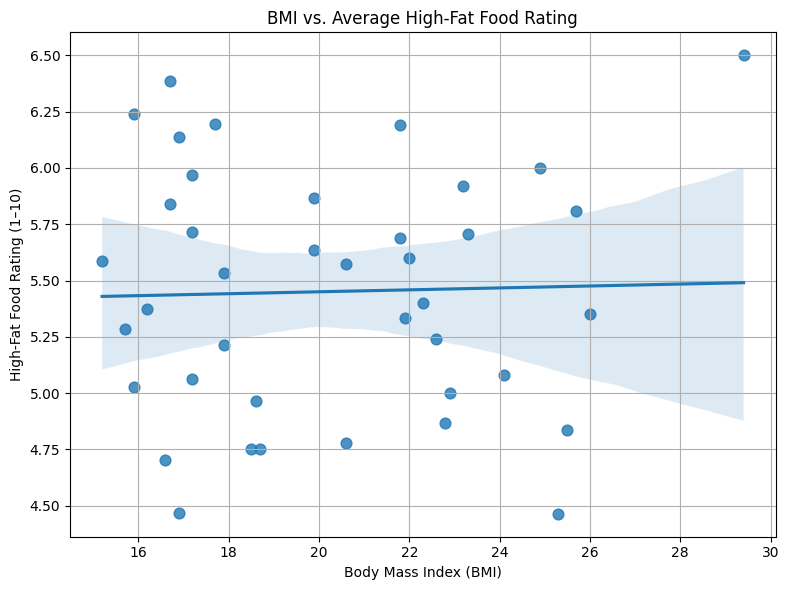

In [48]:
plt.figure(figsize=(8, 6))
sns.regplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', scatter_kws={'s': 60})
plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

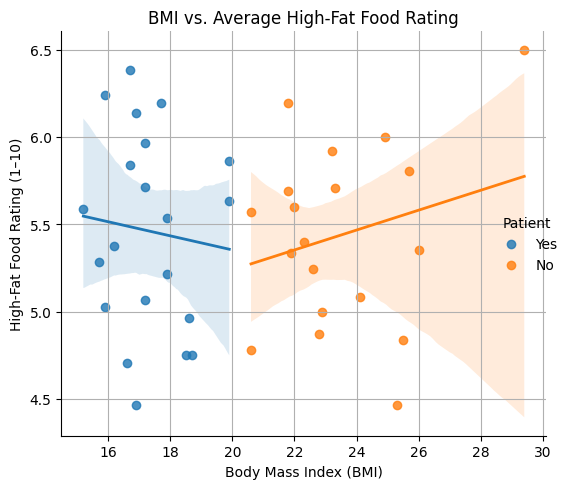

In [56]:
# color by patient group
plt.figure(figsize=(8, 6))
sns.lmplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', hue='Patient',line_kws={'linewidth': 2})
plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

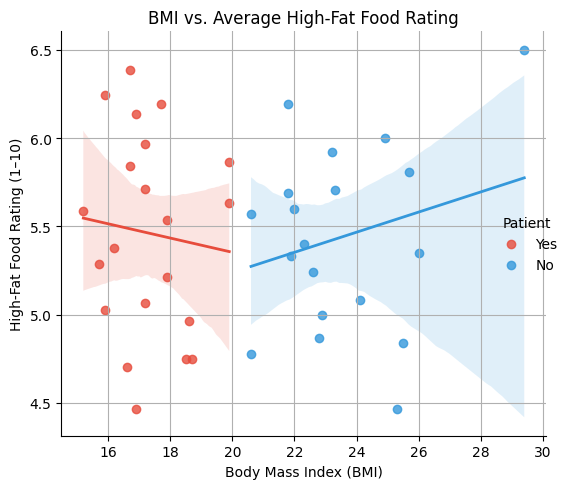

In [57]:
#We can change the colors using a custom palette

custom_palette = {
    'Yes': '#E74C3C',   # red
    'No': '#3498DB'    # blue
}

# color by patient group
plt.figure(figsize=(8, 6))
sns.lmplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', hue='Patient',line_kws={'linewidth': 2},palette=custom_palette)
plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# change the plot labels

In [ ]:
#Is the plot different if we look at high-fat and low-sugar foods?
# How about if we plot average high-fat (collapse across sugar)

In [ ]:
# Advanced
# Try and plot, in the patient group only BMI against choice preference for high vs low fat

In [ ]:
# Let's also look at age

In [66]:
# Now, let's use a regression model to compare patients and HC and adjust for age
import statsmodels.formula.api as smf

# Variables to test
variables = ['BMI']

results = []

for var in variables:
    # Formula: outcome ~ patient_status + age
    formula = f"{var} ~ C(Patient) + Age"
    
    # Fit linear model
    model = smf.ols(formula=formula, data=demo_sub).fit()
    
    # Extract results for patient_status (the group effect)
    coef = model.params.get('C(Patient)[T.Yes]', float('nan'))
    pval = model.pvalues.get('C(Patient)[T.Yes]', float('nan'))
    conf_int = model.conf_int().loc['C(Patient)[T.Yes]'].tolist()
    
    results.append({
        'variable': var,
        'coef_patient_vs_control': coef,
        'p_value': pval,
        'conf_lower': conf_int[0],
        'conf_upper': conf_int[1]
    })

# Convert to DataFrame and print
df_results = pd.DataFrame(results)
print(df_results)

  variable  coef_patient_vs_control       p_value  conf_lower  conf_upper
0      BMI                -6.148525  6.697756e-13    -7.31085     -4.9862


In [62]:
demo_sub

,ID,Patient,BMI,EDE Score,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,average_rating_health_fathigh_sugarlow,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
0,1,Yes,17.9,4.9,5.533333,5.000000,5.000000,5.176471,6.285714,6.750000,...,1.842857,2.118824,2.490571,2.122500,2.568571,2.295333,2.689545,1.933333,2.017368,2.045789
1,2,Yes,18.6,5.3,4.965517,4.714286,6.187500,6.846154,5.357143,5.600000,...,2.751875,2.696923,2.089286,2.365333,2.140588,2.759333,2.331471,2.449286,2.250000,2.568571
2,3,No,22.3,0.6,5.400000,5.333333,5.222222,6.800000,5.500000,6.166667,...,1.654444,2.846000,2.420714,2.274444,2.129167,1.995000,2.201613,1.737000,2.311111,2.371364
3,4,No,22.9,0.5,5.000000,5.230769,4.090909,5.736842,4.818182,5.000000,...,2.538182,2.412632,2.270455,2.030714,2.410417,2.580000,2.312500,2.423333,1.713000,1.317500
4,5,Yes,15.7,4.1,5.285714,6.000000,5.000000,5.812500,5.838710,6.083333,...,2.267333,2.585625,2.168065,2.430833,1.938824,2.593077,2.277813,1.980000,2.262222,2.510833
5,6,Yes,17.2,3.5,5.967742,7.125000,5.777778,7.461538,5.878788,5.300000,...,2.367222,1.875385,2.300000,2.284000,2.374615,2.649444,2.038500,2.294545,2.050000,2.658333
6,7,Yes,18.7,4.6,4.750000,7.133333,4.588235,7.000000,4.833333,5.000000,...,2.330588,1.383333,2.287000,1.992222,2.058889,2.368333,2.142333,2.453571,2.330000,2.006000
7,8,Yes,17.2,4.2,5.714286,6.055556,6.083333,3.666667,4.500000,5.416667,...,1.725000,2.435333,2.255833,1.726667,2.392222,2.361429,2.236875,1.755000,2.502308,2.672500
8,9,No,22.0,1.7,5.600000,5.894737,5.125000,3.933333,5.750000,7.470588,...,2.236875,2.276000,2.206429,2.453529,2.096875,2.468462,1.890556,2.173077,2.406429,2.672000
9,10,No,22.8,0.2,4.869565,5.900000,6.058824,4.357143,5.214286,6.444444,...,2.292941,1.992143,2.355714,2.322222,2.098400,2.050769,2.500000,1.955714,1.837273,2.498125


In [75]:
# We can create interaction terms by using * (e.g., Patient * fat would be an interaction between Patient and fat content)
# Try now to examine whether patients and HC differ in choice ratings for high and low fat foods

demo_sub['high_fat_choice'] = demo_sub.average_rating_choice_fathigh_sugarhigh + demo_sub.average_rating_choice_fathigh_sugarlow
demo_sub['low_fat_choice'] = demo_sub.average_rating_choice_fathigh_sugarhigh + demo_sub.average_rating_choice_fathigh_sugarlow

long_vars=demo_sub[['ID','high_fat_choice','low_fat_choice','Patient','Age','BMI']]


long = pd.melt(long_vars, 
                  id_vars=['ID'],
                  value_vars=['high_fat_choice','low_fat_choice'],
                  var_name='Fat', 
                  value_name='Choice')

long=pd.merge(long,long_vars)




In [76]:
formula = "Choice ~ C(Patient)*Fat + Age"
    

model = smf.mixedlm(formula=formula, data=long,groups="ID").fit()
    
# Extract results for patient_status (the group effect)
coef = model.params.get('C(Patient)[T.Yes]', float('nan'))
pval = model.pvalues.get('C(Patient)[T.Yes]', float('nan'))
conf_int = model.conf_int().loc['C(Patient)[T.Yes]'].tolist()

In [77]:
# Is this significant?

np.float64(-0.2067030607401858)

In [ ]:
# Now try to group the demo df by patient status and correlate fat intake at meal and age

In [79]:
data

,Unnamed: 0,ID,Age,Patient,Medication,BMI,Fat (g),Calories,Protein (g),Sugar (g),EDE Score,Duration of Illness
0,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9
1,1,2,46,Yes,Yes,18.6,9,306,12,15,5.3,1.5
2,2,3,32,No,Yes,22.3,24,635,36,20,0.6,NaN
3,3,4,60,No,No,22.9,32,456,27,21,0.5,NaN
4,4,5,25,Yes,No,15.7,11,332,16,17,4.1,9.6
5,5,6,38,Yes,No,17.2,12,318,9,14,3.5,8.6
6,6,7,56,Yes,No,18.7,14,213,8,16,4.6,4.2
7,7,8,36,Yes,No,17.2,14,317,10,18,4.2,9.6
8,8,9,40,No,No,22.0,25,784,23,24,1.7,NaN
9,9,10,28,No,No,22.8,19,576,22,29,0.2,NaN


In [86]:
vars_of_interest=['BMI','Calories']

grouped_corrs = data.groupby('Patient')[vars_of_interest].corr()



# To access individual group's correlation matrix:
corr_patient = grouped_corrs.loc['Yes']
corr_control = grouped_corrs.loc['No']

In [87]:
## Next, load in the delay discounting data



,BMI,Calories
BMI,1.000000,-0.182286
Calories,-0.182286,1.000000


# Homework
## Complete tasks below and paste upload solution to Github

In [ ]:
## Calculate the average number of delayed choices in patient and HC groups



In [ ]:
## Correlation between age, delayed choices and impulsivity scale per group

In [ ]:
## Plot delayed choices and impulsivity by patient group